In [2]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
df=pd.read_csv(r"C:\Users\Admin\MSc Applied Statistics SPU\csv file\python - Copy.csv")

In [4]:
df.head()

,TEMP,SOAK-TIME,SOAKPCT,DIFFTIME,DIFFPCT,PITCH
0,1650,0.58,1.10,0.25,0.90,0.013
1,1650,0.66,1.10,0.33,0.90,0.016
2,1650,0.66,1.10,0.33,0.90,0.015
3,1650,0.66,1.10,0.33,0.95,0.016
4,1600,0.66,1.15,0.33,1.00,0.015


In [5]:
df.shape

(32, 6)

In [6]:
X=df.drop(columns='PITCH',axis=1)
y=df["PITCH"]

### a) Fit a linear regression model relating the results of the pitch carbon analysis test (PITCH) to the five regressor variables.

In [7]:
# Add a constant to the model (for the intercept)
X_new = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X_new).fit()

# Display the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  PITCH   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     24.06
Date:                Sat, 30 Nov 2024   Prob (F-statistic):           5.45e-09
Time:                        02:43:35   Log-Likelihood:                 131.30
No. Observations:                  32   AIC:                            -250.6
Df Residuals:                      26   BIC:                            -241.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0369      0.144     -0.257      0.7

**b)**

**const (Intercept): -0.0369:** The intercept is the value of PITCH when all other predictors are zero. However, its p-value (0.799) is quite high, indicating that it's not statistically significant.

**TEMP (4.877e-05):** The coefficient for TEMP is small and positive, but its p-value (0.497) is quite high. This means TEMP does not significantly affect PITCH in this model.

**SOAK-TIME (0.0007):** The coefficient for SOAK-TIME is positive,For every 1 unit increase in SOAK-TIME, the predicted value of PITCH increases by 0.0007 units, assuming all other variables are constant.Its p-value (0.122) is not statistically significant at the 0.05 level, indicating it's likely not a strong predictor of PITCH.

**SOAKPCT (-0.0341):** This coefficient is negative,indicating that for every 1 unit increase in SOAKPCT, the predicted value of PITCH decreases by 0.0341 units, assuming all other variables are constant. Its p-value (0.394) is not significant.

**DIFFTIME (0.0133):** This variable has a positive and statistically significant coefficient (p-value = 0.000). This suggests that as DIFFTIME increases, PITCH increases, and this relationship is significant.

**DIFFPCT (0.0049):** The coefficient is small and positive, but its p-value (0.758) is very high, indicating it is not statistically significant.


**R-squared: 0.822:** This means that 82.20% of the variance in the dependent variable (PITCH) is explained by the independent variables in the model. 


Given the high **F-statistic(24.06)** and low **p-value(Prob (F-statistic): 5.45e-09)**, we can conclude that there is sufficient evidence to reject the null hypothesis. This suggests that at least one of the independent variables in the model significantly contributes to predicting the dependent variable (PITCH).

### (c) Estimate 𝜎^2 for the model. 

The formula for the **sigma-square estimate** in linear regression is:

$$ \hat{\sigma}^2 = \frac{1}{n - p} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

**OR**

$$ \hat{\sigma}^2 = \frac{SSR}{n - p} $$


In [9]:
n = len(df)   
p = len(model.params) 

SSR=np.sum(model.resid**2)

sigma_square_estimate=SSR/(n-p)
print(sigma_square_estimate)

1.9668650024217878e-05


### (d) Find the standard errors of the regression coefficients. 

In [10]:
#model.bse contains the standard errors of those estimated coefficients.
print("Standard errors of the regression coefficients:",model.bse)

Standard errors of the regression coefficients: const        0.143666
TEMP         0.000071
SOAK-TIME    0.000406
SOAKPCT      0.039315
DIFFTIME     0.002634
DIFFPCT      0.015719
dtype: float64


The bse attribute in the context of a regression model fitted using statsmodels, such as with OLS, stands for "beta standard errors." It provides the standard errors of the estimated coefficients (also called beta coefficients) in the regression model.

In [11]:
#model.params contains the estimated coefficients from the regression.
print(model.params)

const       -0.036881
TEMP         0.000049
SOAK-TIME    0.000651
SOAKPCT     -0.034069
DIFFTIME     0.013299
DIFFPCT      0.004897
dtype: float64


E)

In [12]:
print(model.tvalues)
print(model.pvalues)

const       -0.256714
TEMP         0.688779
SOAK-TIME    1.600721
SOAKPCT     -0.866562
DIFFTIME     5.049114
DIFFPCT      0.311528
dtype: float64
const        0.799420
TEMP         0.497063
SOAK-TIME    0.121521
SOAKPCT      0.394109
DIFFTIME     0.000030
DIFFPCT      0.757883
dtype: float64


### f) Plot residuals and comment on model adequacy. 

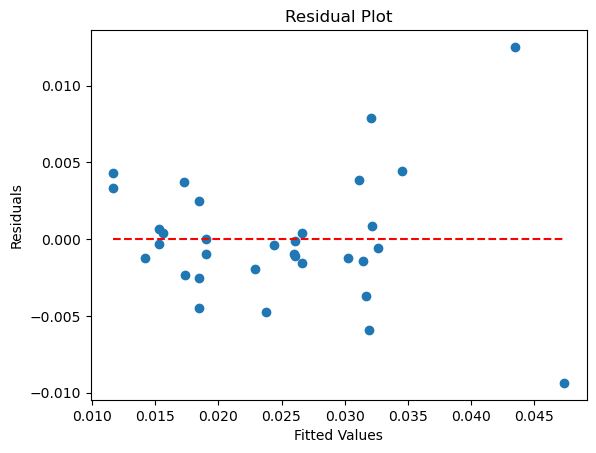

In [29]:
#residuals
residuals = model.resid
#fitted_values
fitted_values=model.resid

# Plot the residuals against the fitted values
plt.scatter(model.fittedvalues, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.hlines(0, xmin=model.fittedvalues.min(), xmax=model.fittedvalues.max(), colors='r', linestyles='--')
plt.show()

**1. Random Distribution Around Zero:**
The residuals are scattered around the horizontal axis (y=0), which is a positive sign. This suggests that the model does not have a clear pattern of errors and that it generally fits the data well.
There are a few points that lie just above or below the horizontal axis, indicating slight variations between the observed and predicted values.

**2. No Clear Pattern:**
There is no obvious systematic pattern in the residuals, such as a funnel shape or curvature. This indicates that the model's assumptions regarding the relationship between the variables, such as linearity, are generally satisfied.

**3. Homoscedasticity:**
The spread of the residuals appears to be relatively consistent across the range of fitted values, which indicates homoscedasticity. This means the variance of errors is constant, a key assumption for linear regression models.


**4. Outliers:**
There is one noticeable outlier on the right side of the plot, with a fitted value above 0.045 and a relatively large positive residual. This point may warrant further investigation as it could have a significant impact on the model's performance.

**Overall Model Adequacy:-**The residual plot suggests that the model is generally adequate, as the residuals do not show a clear pattern, and there is no evidence of heteroscedasticity. However, the presence of the outlier could indicate that there might be an issue with the model for certain data points, or it might simply reflect an unusual observation in the data.

In conclusion, while the model seems to fit the data reasonably well, you might want to examine the outlier further to determine whether it is an anomaly or if it reveals a potential weakness in the model.

### g) Find 95% confidence intervals on the regression coefficients. 


In [14]:
conf_int=model.conf_int(alpha=0.05)
print(conf_int)

                  0         1
const     -0.332192  0.258429
TEMP      -0.000097  0.000194
SOAK-TIME -0.000185  0.001486
SOAKPCT   -0.114883  0.046745
DIFFTIME   0.007885  0.018713
DIFFPCT   -0.027414  0.037208


In the model summary, look for the columns labeled "[0.025]" and "[0.975]". These columns will contain the lower and upper bounds of the 95% confidence intervals for each regression coefficient.

### h) Find a 95% confidence interval on mean PITCH for TEMP = 1650, SOAK-TIME = 1.00, SOAKPCT = 1.10, DIFFTIME = 1.00, and DIFFPCT = 0.80. 

In [20]:
# Create new data point
new_data = pd.DataFrame({'const': 1, 'TEMP': 1650, 'SOAK-TIME': 1.00,
                         'SOAKPCT': 1.10, 'DIFFTIME': 1.00,'DIFFPCT': 0.80}, index=[0])

In [21]:
# Predict mean PITCH and get the summary frame
predicted_pitch = model.get_prediction(new_data)
summary = predicted_pitch.summary_frame(alpha=0.05)

# Check what columns are available
print(summary.columns)


Index(['mean', 'mean_se', 'mean_ci_lower', 'mean_ci_upper', 'obs_ci_lower',
       'obs_ci_upper'],
      dtype='object')


In [22]:
# Predict mean PITCH and get confidence interval using the correct column names
confidence_interval = summary[['obs_ci_lower', 'obs_ci_upper']]
confidence_interval
#obs_ci_lower:-The lower bound of the confidence interval for individual observations.
#obs_ci_upper:-The Upper bound of the confidence interval for individual observations.

,obs_ci_lower,obs_ci_upper
0,0.014477,0.033488


In [23]:
confidence_interval_m = summary[['mean_ci_lower', 'mean_ci_upper']]
confidence_interval_m

,mean_ci_lower,mean_ci_upper
0,0.021289,0.026676


In [19]:
print("Predicted mean PITCH:", predicted_pitch.summary_frame()['mean'][0])
print("95% confidence interval:", confidence_interval)
print("95% confidence interval:", confidence_interval_m)

Predicted mean PITCH: 0.023982648676248542
95% confidence interval:    obs_ci_lower  obs_ci_upper
0      0.014477      0.033488
95% confidence interval:    mean_ci_lower  mean_ci_upper
0       0.021289       0.026676


The model predicts that the average PITCH is approximately 0.02398.

You can be 95% confident that the true mean PITCH lies between 0.021289 and 0.026676.

Individual PITCH observations can vary more widely, typically ranging from 0.0.014477 to 0.033488, reflecting the variability inherent in the data.

### i) Fit a new model to the response PITCH using new regressors 𝑥1 = SOAKTIME × SOAKPCT and 𝑥2 = DIFFTIME × DIFFPCT. 


In [36]:
df.columns

Index(['TEMP', 'SOAK-TIME', 'SOAKPCT', 'DIFFTIME', 'DIFFPCT', 'PITCH'], dtype='object')

In [24]:
#add new regressor
df['x1'] = df['SOAK-TIME'] * df['SOAKPCT']
df['x2'] = df['DIFFTIME'] * df['DIFFPCT']

In [25]:
df.head()

,TEMP,SOAK-TIME,SOAKPCT,DIFFTIME,DIFFPCT,PITCH,x1,x2
0,1650,0.58,1.10,0.25,0.90,0.013,0.638,0.2250
1,1650,0.66,1.10,0.33,0.90,0.016,0.726,0.2970
2,1650,0.66,1.10,0.33,0.90,0.015,0.726,0.2970
3,1650,0.66,1.10,0.33,0.95,0.016,0.726,0.3135
4,1600,0.66,1.15,0.33,1.00,0.015,0.759,0.3300


In [26]:
# Fit the new model with the interaction terms
X_new = sm.add_constant(df[['x1', 'x2']])
model_new = sm.OLS(df['PITCH'], X_new).fit()

In [27]:
print(model_new.summary())

                            OLS Regression Results                            
Dep. Variable:                  PITCH   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     50.08
Date:                Sat, 12 Oct 2024   Prob (F-statistic):           3.92e-10
Time:                        21:07:52   Log-Likelihood:                 127.56
No. Observations:                  32   AIC:                            -249.1
Df Residuals:                      29   BIC:                            -244.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0097      0.002      4.731      0.0

**R-squared: 0.775:-** This indicates that 77.5% of the variance in the dependent variable (PITCH) is explained by the independent variables x1 and x2. This is a relatively high R-squared value, suggesting that the model has a good fit to the data.

 **F-statistic: 50.08, p-value[Prob (F-statistic): 3.92e-10]:-**
The F-statistic tests whether at least one of the regression coefficients is different from zero. The very low p-value (3.92e-10) associated with the F-statistic indicates that the model is statistically significant, meaning at least one of the predictors x1 or x2  is significantly related to the dependent variable PITCH.

**Intercept (const): 0.0097:** This is the predicted value of PITCH when both x1 and x2 are zero. While it may or may not have a practical interpretation depending on the context, it is statistically significant (p-value = 0.000), indicating that the intercept is not zero.

**x1 Coefficient: 0.0014:** For every one-unit increase in x1,the PITCH is expected to increase by 0.0014 units, holding x2 constant. The associated p-value (0.000) indicates that this effect is statistically significant.

**x2 Coefficient: 0.0141 :** For every one-unit increase in x2, the PITCH is expected to increase by 0.0141 units, holding x1 constant. This coefficient is also statistically significant, with a p-value of 0.000.

### (j) Test the model in part (a) for significance of regression using 𝛼 = 0.05. Also calculate the 𝑡-test for each regressor, and draw conclusions. 


In [28]:
from scipy.stats import f, t

In [29]:
# Calculate sums of squares
SST = np.sum((df['PITCH'] - np.mean(df['PITCH']))**2)

SSR = np.sum((model.fittedvalues - np.mean(df['PITCH']))**2)

SSE = np.sum(model.resid**2)
print("SSE:-",SSE)
print("SSR:-",SSR)
print("SST:-",SST)

SSE:- 0.0005113849006296648
SSR:- 0.0023660838493703203
SST:- 0.0028774687500000003


In [31]:
# Calculate F-statistic
k = X.shape[1] - 1  # Number of independent variables
n = df.shape[0]
F_stat = (SSR / k) / (SSE / (n - k - 1))

In [32]:
# Find p-value for F-statistic
p_value_f = f.sf(F_stat, k, n - k - 1)

In [33]:
# Calculate t-statistics and p-values
t_stats = model.params / model.bse
p_values_t = t.sf(np.abs(t_stats), n - k - 1) * 2  # Two-tailed test

In [38]:
for regressor, t_stat, p_value in zip(X.columns, t_stats, p_values_t):
    print(f"{regressor}:- (p-value = {p_value:.3f})")

const:- (p-value = 0.799)
TEMP:- (p-value = 0.497)
SOAK-TIME:- (p-value = 0.122)
SOAKPCT:- (p-value = 0.394)
DIFFTIME:- (p-value = 0.000)
DIFFPCT:- (p-value = 0.758)


In [34]:
# Print results
print("F-statistic:", round(F_stat,4))
print("p-value for F-statistic:",p_value_f)

for regressor, t_stat, p_value in zip(X.columns, t_stats, p_values_t):
    print(f"{regressor}: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")

F-statistic: 24.0594
p-value for F-statistic: 5.445598029916891e-09
const: t-statistic = -0.257, p-value = 0.799
TEMP: t-statistic = 0.689, p-value = 0.497
SOAK-TIME: t-statistic = 1.601, p-value = 0.122
SOAKPCT: t-statistic = -0.867, p-value = 0.394
DIFFTIME: t-statistic = 5.049, p-value = 0.000
DIFFPCT: t-statistic = 0.312, p-value = 0.758


###  k) Estimate 𝜎^2 for the model from part (i), and compare this to the estimate of 𝜎^2 obtained in part (c). Which estimate is smaller? Does this offer any insight regarding which model might be preferable? 

In [40]:
#Part (i)
N = len(df)   
P = len(model_new.params) 

SSr=np.sum(model_new.resid**2)

sigma_square_estimate_new=SSr/(N-P)
print("sigma_square_estimate_new:-",sigma_square_estimate_new)

sigma_square_estimate_new:- 2.2278234931106506e-05


In [41]:
#part (c)
n = len(df)   
p = len(model.params) 

SSR=np.sum(model.resid**2)

sigma_square_estimate=SSR/(n-p)
print("sigma_square_estimate:-",sigma_square_estimate)

sigma_square_estimate:- 1.9668650024217878e-05


Given that the model from part (c) has a smaller **sigma_square_estimate** ,it suggests that this model is likely to be preferable because it captures more of the variance in the data with less unexplained noise. In contrast, the higher 
**sigma_square_estimate** from part (i) suggests that the residuals in this model are slightly more spread out, indicating a less accurate fit to the data.

### l) Fit a model to PITCH using regressors 𝑥1 = SOAKTIME × SOAKPCT and 𝑥2 = DIFFTIME × DIFFPCT. Using the model with regressors 𝑥1 and 𝑥2, find a 95% confidence interval on mean PITCH when SOAKTIME = 1.00, SOAKPCT = 1.10, DIFFTIME = 1.00, and DIFFPCT = 0.80. 


In [42]:
#add new regressor
df['x1'] = df['SOAK-TIME'] * df['SOAKPCT']
df['x2'] = df['DIFFTIME'] * df['DIFFPCT']

In [43]:
X_new = sm.add_constant(df[['x1', 'x2']])
model_new = sm.OLS(df['PITCH'], X_new).fit()

In [44]:
df.head()

,TEMP,SOAK-TIME,SOAKPCT,DIFFTIME,DIFFPCT,PITCH,x1,x2
0,1650,0.58,1.10,0.25,0.90,0.013,0.638,0.2250
1,1650,0.66,1.10,0.33,0.90,0.016,0.726,0.2970
2,1650,0.66,1.10,0.33,0.90,0.015,0.726,0.2970
3,1650,0.66,1.10,0.33,0.95,0.016,0.726,0.3135
4,1600,0.66,1.15,0.33,1.00,0.015,0.759,0.3300


In [45]:
# Create new data point
new_dataset= pd.DataFrame({'const': 1, 'x1': 1.00 * 1.10, 'x2': 1.00 * 0.80},index=[0])

In [46]:
# Predict mean PITCH and get the summary frame
predicted_pitch1= model_new.get_prediction(new_dataset)
summary = predicted_pitch1.summary_frame()

# Check what columns are available
print(summary.columns)

Index(['mean', 'mean_se', 'mean_ci_lower', 'mean_ci_upper', 'obs_ci_lower',
       'obs_ci_upper'],
      dtype='object')


In [47]:
confidence_interval2 = summary[['obs_ci_lower', 'obs_ci_upper']]
confidence_interval2

,obs_ci_lower,obs_ci_upper
0,0.012563,0.032285


In [48]:
confidence_interval_m2 = summary[['mean_ci_lower', 'mean_ci_upper']]
confidence_interval_m2

,mean_ci_lower,mean_ci_upper
0,0.020411,0.024437


In [49]:
print("Predicted mean PITCH:", predicted_pitch.summary_frame()['mean'][0])
print("95% confidence interval:", confidence_interval2)
print("95% confidence interval:", confidence_interval_m2)

Predicted mean PITCH: 0.023982648676248542
95% confidence interval:    obs_ci_lower  obs_ci_upper
0      0.012563      0.032285
95% confidence interval:    mean_ci_lower  mean_ci_upper
0       0.020411       0.024437


The model predicts that the average PITCH is approximately 0.02398.

There is 95% confidence that the true mean PITCH falls between 0.02041 and 0.02444.

Individual PITCH values are expected to vary, typically ranging from 0.01256 to 0.03229, which is broader than the confidence interval for the mean due to the inherent variability in individual data points.

### m) Compare the length of this confidence interval with the length of the confidence interval on mean PITCH at the same point from part (h), where an additive model in SOAKTIME, SOAKPCT, DIFFTIME, and DIFFPCT was used. Which confidence interval is shorter? Does this tell you anything about which model is preferable? 


In [52]:
# Compare the lengths of the intervals
length_old =confidence_interval_m['mean_ci_upper'] - confidence_interval_m['mean_ci_lower']
length_new = confidence_interval_m2['mean_ci_upper'] - confidence_interval_m2['mean_ci_lower']

print("Length of confidence interval from length of old model:", length_old)
print("Length of confidence interval from length of new model:", length_new)


Length of confidence interval from length of old model: 0    0.005388
dtype: float64
Length of confidence interval from length of new model: 0    0.004027
dtype: float64


The new model confidence interval length **(0.004027)** is shorter than that of the old model **(0.005388)** , indicating that the new model provides a more precise estimate of mean PITCH

### n) Take a 80:20 hold-out split on the data provided and train the same model using all regressors. 


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

In [54]:
x=df.drop(columns=['PITCH','x1','x2'])
y=df['PITCH']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [76]:
len(X_train),len( X_test), len(y_train), len(y_test) 

(25, 7, 25, 7)

### o) Calculate accuracy of the model on the testing data based on the split. 

In [56]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [57]:
# Make predictions
y_pred = model.predict(X_test)

In [87]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 5.8039166709664226e-05
R-squared: 0.6236210734815316
